In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, metrics, neighbors 
from sklearn.model_selection import cross_val_score

#%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/maxim/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Генерация датасета

In [2]:
import scipy.stats as sps

In [3]:
x = np.linspace(0, 100, num = 500)
y = 0.5 * x + 1 + sps.norm.rvs(size = 500, loc = 0, scale = np.sqrt(0.2))

## Визуализация выборки

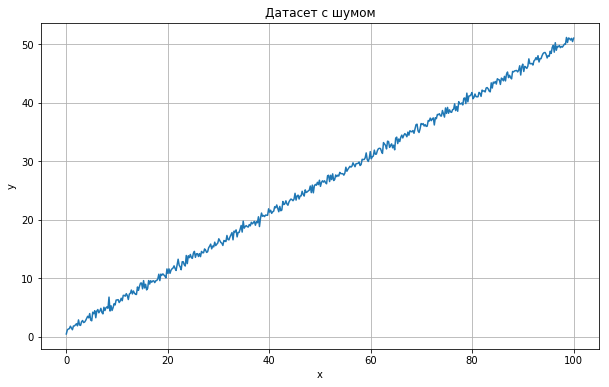

In [4]:
plt.figure(figsize=(10, 6))
plt.grid()
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title(u'Датасет с шумом')
plt.show()

## Минимизация MSE

In [5]:
def MSE(k):
    buf = np.array([(y[i] - k[0] * x[i] - k[1]) ** 2 for i in range(x.size)])
    return np.sqrt(buf.mean())

In [6]:
MSE([0.5, 1])

0.45987609728652007

In [7]:
from scipy.optimize import minimize

In [8]:
x_min = minimize(MSE, [2, 2])
print(x_min)

      fun: 0.4595055333416108
 hess_inv: array([[  5.79171184e-04,  -2.91978747e-02],
       [ -2.91978747e-02,   1.93327363e+00]])
      jac: array([  5.14835119e-06,  -9.68575478e-08])
  message: 'Optimization terminated successfully.'
     nfev: 76
      nit: 9
     njev: 19
   status: 0
  success: True
        x: array([ 0.49986867,  1.02462903])


## Визуализация воcстановленной прямой

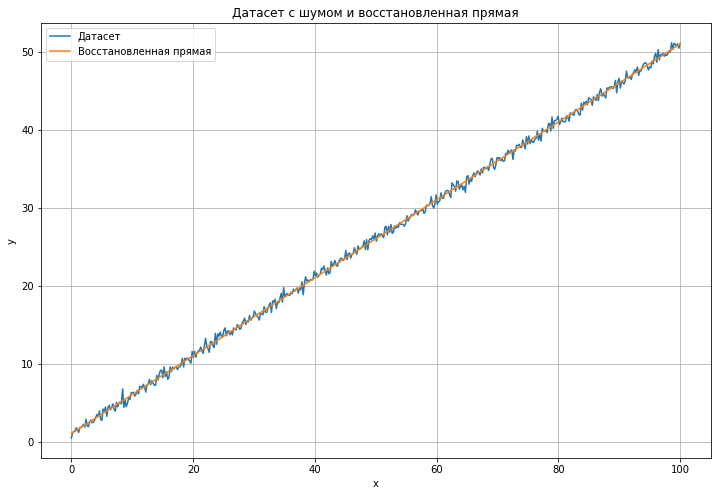

In [9]:
plt.figure(figsize=(12, 8))
plt.grid()
plt.plot(x, y, label = u'Датасет')
plt.plot(x, x * x_min.x[0] + x_min.x[1], label = u'Восcтановленная прямая')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title(u'Датасет с шумом и восcтановленная прямая')
plt.show()

## Добавка выброса

In [11]:
x = np.append(x, sps.uniform.rvs(size = 75, loc = 0, scale = 100))
y = np.append(y, -1 + sps.norm.rvs(size = 75, loc = 0, scale = np.sqrt(0.2)))

In [12]:
def MAE(k):
    buf = np.array([np.abs(y[i] - k[0] * x[i] - k[1]) for i in range(x.size)])
    return buf.mean()

In [13]:
MSE_x_min = minimize(MSE, [2, 2])
print(MSE_x_min)

      fun: 9.85603446964867
 hess_inv: array([[  1.17023457e-02,  -5.82755686e-01],
       [ -5.82755686e-01,   3.85559443e+01]])
      jac: array([  5.12599945e-06,  -1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 72
      nit: 14
     njev: 18
   status: 0
  success: True
        x: array([ 0.44718607,  0.34450879])


In [14]:
MAE_x_min = minimize(MAE, [2, 2])
print(MAE_x_min)

      fun: 3.6080292790411073
 hess_inv: array([[  3.75708665e-05,  -1.59681396e-03],
       [ -1.59681396e-03,   1.35236378e-01]])
      jac: array([ 0.01659179,  0.00110373])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 440
      nit: 12
     njev: 107
   status: 2
  success: False
        x: array([ 0.50028112,  0.92087293])


## Визуализация

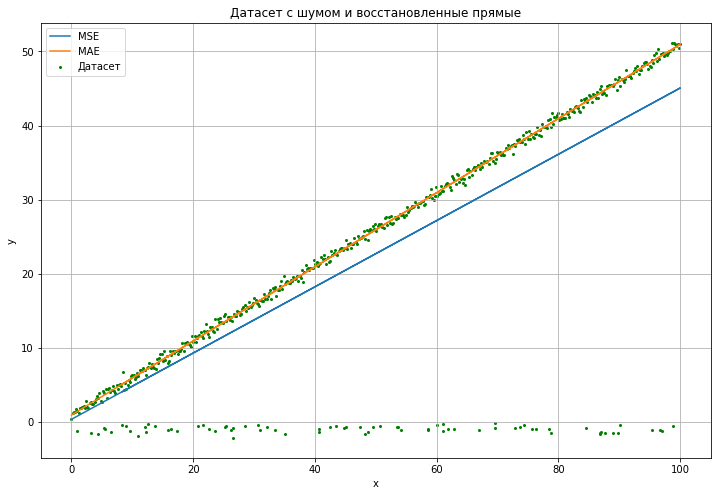

In [26]:
plt.figure(figsize=(12, 8))
plt.grid()
plt.scatter(x, y, label = u'Датасет', color = 'green', s = 4)
plt.plot(x, x * MSE_x_min.x[0] + MSE_x_min.x[1], label = 'MSE')
plt.plot(x, x * MAE_x_min.x[0] + MAE_x_min.x[1], label = 'MAE')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title(u'Датасет с шумом и восcтановленные прямые')
plt.show()

## Выводы

Модель, оптимизирующая MAE, устойчива к выбросам, в отличии от MSE.